In [47]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rc('figure', figsize=(11, 9))
#plt.rc('font', size=13)

# turn off pink warning boxes
#import warnings
#warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

from acquire import get_titanic_data
from acquire import get_iris_data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## 1. In a jupyter notebook, `classification_exercises.ipynb`, use a python module (pydata or seaborn datasets) containing datasets as a source from the `iris` data. 
Create a pandas dataframe, `df_iris`, from this data.

- 1a. print the first 3 rows

In [16]:
import seaborn as sns
df_iris = sns.load_dataset('iris')

df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


- 1b. print the number of rows and columns (shape)

In [3]:
df_iris.shape

(150, 5)

- 1c. print the column names

In [4]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

- 1d. print the data type of each column

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- 1e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [18]:
df_iris.describe()
# The only thing I'd rescale would be changing the string species to a numerical value to work with.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [21]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

,mean,50%,std,range
sepal_length,5.843333,5.80,0.828066,3.6
sepal_width,3.057333,3.00,0.435866,2.4
petal_length,3.758000,4.35,1.765298,5.9
petal_width,1.199333,1.30,0.762238,2.4


## 2. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

In [23]:
# change the privacy "Change to anyone with the link, click Done. THEN copy URL"
sheet_url = 'https://docs.google.com/spreadsheets/d/1vHJIplUHGfww3mRToaMgFEl9227qJNlC_kjNHKDjO1M/edit#gid=1660399280'

In [24]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [25]:
df_excel = pd.read_csv(csv_export_url)
df_excel.head(2)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.4,No


- 2a. assign the first 100 rows to a new dataframe, `df_excel_sample`

In [26]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


- 2b. print the number of rows of your original dataframe

In [31]:
df_excel.index

RangeIndex(start=0, stop=7049, step=1)

In [33]:
df_excel.customer_id.count()

7049

In [26]:
df_excel.shape[0]

7049

- 2c. print the first 5 column names 

In [37]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- 2d. print the column names that have a data type of `object`

In [38]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [43]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

- 2e. compute the range for each of the numeric variables.

In [49]:
df_excel.select_dtypes(exclude=object).columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

In [44]:
df_excel.select_dtypes(include=['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_senior_citizen  7049 non-null   int64  
 1   phone_service      7049 non-null   int64  
 2   internet_service   7049 non-null   int64  
 3   contract_type      7049 non-null   int64  
 4   monthly_charges    7049 non-null   float64
 5   total_charges      7038 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 330.5 KB


In [28]:
excelfloats = df_excel.select_dtypes(include='float64')
excelfloats.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [59]:
(df_excel.select_dtypes(include='float64').max()) - (df_excel.select_dtypes(include='float64').min())

monthly_charges     100.5
total_charges      8666.0
dtype: float64

In [60]:
(excelfloats.max()) - (excelfloats.min())

monthly_charges     100.5
total_charges      8666.0
dtype: float64

## 3. Read the data from this google sheet into a dataframe, `df_google`

In [30]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [31]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [32]:
df_google = pd.read_csv(csv_export_url)
df_google.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


- 3a. print the first 3 rows

In [64]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 3b. print the number of rows and columns

In [65]:
df_google.shape

(891, 12)

- 3c. print the column names

In [33]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

- 3d. print the data type of each column

In [71]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- 3e. print the summary statistics for each of the numeric variables

In [34]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df_google.select_dtypes(exclude=object).describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [75]:
df_google.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 3f. print the unique values for each of your categorical variables

In [41]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [36]:
df_google.select_dtypes(include=object).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [37]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [38]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [40]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Make a function named `get_titanic_data` that returns the `titanic` data from the codeup data science database as a pandas data frame. Obtain your data from the *Codeup Data Science Database*.

In [2]:
from env import host, user, password

In [15]:
#def get_connection(db, user=user, host=host, password=password):
#    '''
#    This function uses my info from my env file to
#    create a connection url to access the Codeup db.
#    '''
#    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [16]:
#def get_titanic_data():
#    '''
#    This function reads in the titanic data from the Codeup db
#    and returns a pandas DataFrame with all columns.
#    '''
#    sql_query = 'SELECT * FROM passengers'
#    return pd.read_sql(sql_query, get_connection('titanic_db'))

In [23]:
titanic = get_titanic_data()
titanic.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [7]:
from acquire import get_titanic_data

In [8]:
titanic = get_titanic_data()
titanic.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


## Make a function named `get_iris_data` that returns the data from the `iris_db` on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the `species_ids`. Obtain your data from the *Codeup Data Science Database*.

In [ ]:
def get_iris_data():
    '''
    This function reads in the titanic data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = 'select * from species join measurements using (species_id);'
    return pd.read_sql(sql_query, get_connection('iris_db'))

In [3]:
from acquire import get_iris_data

In [4]:
iris = get_iris_data()
iris.head(2)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2


## Once you've got your `get_titanic_data` and `get_iris_data` functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like `titanic.csv` or `iris.csv`. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [31]:
os.path.isfile('titanic.csv')

False

In [9]:
titanic.to_csv('titanic.csv')

In [11]:
os.path.isfile('titanic.csv')

True

In [12]:
os.path.isfile('iris.csv')

False

In [13]:
iris.to_csv('iris.csv')

In [14]:
os.path.isfile('iris.csv')

True

# Data Preparation EXERCISES
The end product of this exercise should be the specified functions in a python script named `prepare.py`. Do these in your `classification_exercises.ipynb` first, then transfer to the `prepare.py` file.

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data
1. Use the function defined in `acquire.py` to load the iris data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [10]:
iris_df = acquire.get_iris_data()
iris_df.head(2)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2


In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


2. Drop the `species_id` and `measurement_id` columns.

In [3]:
dropcols = ['species_id', 'measurement_id']

In [4]:
iris_df.drop(columns= dropcols, inplace=True)

In [5]:
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


3. Rename the `species_name` column to just `species`.

In [7]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


4. Create dummy variables of the species name.

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [8]:
dummy_sp = pd.get_dummies(iris_df[['species']])
dummy_sp.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [10]:
iris_df = pd.concat([iris_df, dummy_sp], axis =1)

In [11]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


5. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def clean_iris():
    """
    clean_iris will take an acquired df and 
    remove `species_id` and `measurement_id` columns and 
    rename `species_name` column to just `species` and
    encode 'species_name' column
    
    return: single cleaned dataframe
    """
    
    dropcols = ['species_id', 'measurement_id']
    iris_df.drop(columns= dropcols, inplace=True)
    iris_df.rename(columns={'species_name': 'species'})
    dummy_sp = pd.get_dummies(iris_df[['species_name']])
    return pd.concat([iris_df, dummy_sp], axis =1)

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   species_name             150 non-null    object 
 1   sepal_length             150 non-null    float64
 2   sepal_width              150 non-null    float64
 3   petal_length             150 non-null    float64
 4   petal_width              150 non-null    float64
 5   species_name_setosa      150 non-null    uint8  
 6   species_name_versicolor  150 non-null    uint8  
 7   species_name_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [12]:
# 20% test, 80% train_validate
train_validate, test = train_test_split(iris_df, test_size=0.2, random_state=3210)
train_validate.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
136,virginica,6.3,3.4,5.6,2.4,0,0,1
18,setosa,5.7,3.8,1.7,0.3,1,0,0
147,virginica,6.5,3.0,5.2,2.0,0,0,1
1,setosa,4.9,3.0,1.4,0.2,1,0,0


In [24]:
iris_df.shape

(150, 8)

In [26]:
train_validate.shape

(120, 8)

In [27]:
test.shape

(30, 8)

In [13]:
# 80% train_validate: 30% validate, 70% train.
train, validate = train_test_split(train_validate, train_size=0.7, random_state=3210)

In [30]:
train_validate.shape

(120, 8)

In [28]:
train.shape

(84, 8)

In [29]:
validate.shape

(36, 8)

In [ ]:
def prep_iris():
    iris_df = clean_iris()
    train_validate, test = train_test_split(iris_df, test_size=0.2, random_state=3210)
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=3210)
    return train, validate, test

### Test it out!

In [2]:
iris_df = acquire.rf_iris_data(cached=True)

In [3]:
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [4]:
train, validate, test = prepare.prep_iris(iris_df)

In [5]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
121,virginica,5.6,2.8,4.9,2.0,0,1
3,setosa,4.6,3.1,1.5,0.2,0,0
68,versicolor,6.2,2.2,4.5,1.5,1,0
10,setosa,5.4,3.7,1.5,0.2,0,0


In [6]:
validate.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
93,versicolor,5.0,2.3,3.3,1.0,1,0
60,versicolor,5.0,2.0,3.5,1.0,1,0


In [7]:
test.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
127,virginica,6.1,3.0,4.9,1.8,0,1
17,setosa,5.1,3.5,1.4,0.3,0,0


# EXPLORATORY ANALYSIS EXERCISES

Continue in your `classification_exercises.ipynb` notebook. Use the `iris` dataset. As always, add, commit, and push your changes.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [11]:
iris_df = acquire.get_iris_data()
iris_df.head(2)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2


### 1. Split your data into train, validate, and test samples.

In [13]:
train, validate, test = prepare.prep_iris(iris_df)

In [28]:
iris_df.shape, train.shape, validate.shape, test.shape

((150, 5), (84, 7), (36, 7), (30, 7))

In [15]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
121,virginica,5.6,2.8,4.9,2.0,0,1
3,setosa,4.6,3.1,1.5,0.2,0,0
68,versicolor,6.2,2.2,4.5,1.5,1,0
10,setosa,5.4,3.7,1.5,0.2,0,0


### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. 

In [19]:
melt = train[['species','sepal_length', 'sepal_width', 'petal_length', 'petal_width']].melt(id_vars='species', var_name='variables', value_name = 'measures')
melt.head()

,species,variables,measures
0,versicolor,sepal_length,5.7
1,virginica,sepal_length,5.6
2,setosa,sepal_length,4.6
3,versicolor,sepal_length,6.2
4,setosa,sepal_length,5.4


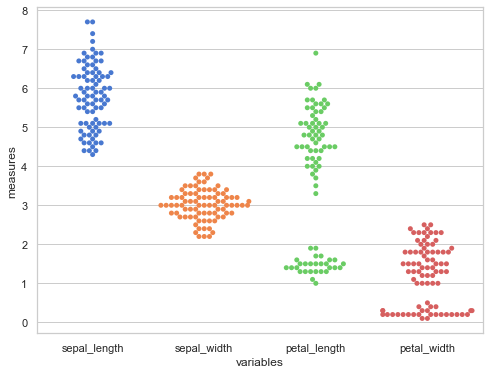

In [22]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x="variables",
    y="measures",
    #hue="survived",
    data=melt,
)

plt.show()

2a. Add another dimension using color to represent species. 

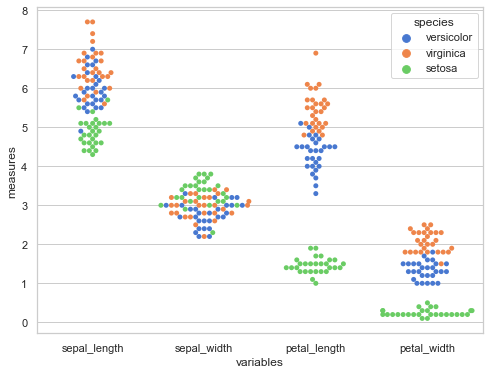

In [23]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x="variables",
    y="measures",
    hue="species",
    data=melt,
)

plt.show()

2b. Document takeaways from this visualization.

- Setosas generally have small but wide sepals with short and narrow petals.
- Virginicas generally have long sepals with a approximate 3" width with long and wide petals.
- Versicolors generally have an average sepal length between the two other species that is slightly narrower than the others. Their petal length and width is closer, but less than the Virginica

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [25]:
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
121,virginica,5.6,2.8,4.9,2.0,0,1


In [30]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,1,0,14.82,3.5
121,virginica,5.6,2.8,4.9,2.0,0,1,15.68,9.8


In [26]:
melt.head(2)

,species,variables,measures
0,versicolor,sepal_length,5.7
1,virginica,sepal_length,5.6


TypeError: unhashable type: 'list'

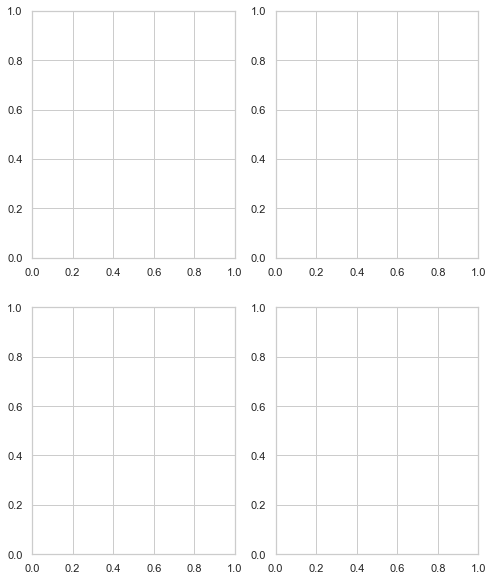

In [34]:
features = ['sepal_length', 'petal_length', 'sepal_area', 'sepal_length']

measurements = ['sepal_width', 'petal_width', 'petal_area', 'petal_length']
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
for i, feature in enumerate(features):
    sns.relplot(feature, measurements, data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    #ax[i].axhline(survival_rate, ls='--', color='grey')

What are your takeaways?

### 4. Create a heatmap of each variable layering correlation coefficient on top.

### 5. Create a scatter matrix visualizing the interaction of each variable.

### 6. Is the sepal length significantly different in virginica compared to versicolor? 

#### 6a. Run a statistical experiment to test this.

#### 6b. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

#### 6c. What is your takeaway from this statistical testing?

### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.